# Introdução:
Dentro do jogo FIFA, os jogadores possuem varios valores ligados a eles, como chute, passe e defesa. Dentre esses valores, a nota geral é o mais importante, pois é ela que dita o quão bom é um jogador no geral, qual seu preço em modos de jogo onde compra de jogadores é possivel, e mais. Com isso, surge uma dúvida: o que é possivel inferir sobre um jogador usando somente o seus valores base?

# Objetivo:
Baseado nos graficos e dados derivados da análise exploratória, levantar questionamentos e responder eles com modelagens.

# Informações dos dados:
O dataset utilizado vem do jogo EAFC26, fornecido pelo site keggle.com (https://www.kaggle.com/datasets/flynn28/eafc26-player-database)

Licensa: GPL3

## Resumo dos valores:
Os valores do dataset que serão analisados são a altura e peso, valor geral e os atributos especificos de ritmo (PAC), passe (PAS), chute (SHO), drible (DRI), físico (PHY) e defesa (DEF).
Originalmente, a altura e o peso estão como strings, com a altura guardando o valor em metros e em pés, e o peso guardando em kg e libras. Além disso, as posições de campo são específicas, ou seja, o atacante não estava somente como atacante, e sim atacante de fronte esquerda. Para simplificar, será criado uma coluna nova para a altura, peso e posição simplificada, com a altura guardando somente o valor em metros, o peso, em kg, e a posição, a posição simplificada (Atacante, Defensor, Meio-campo, Goleiro e Outro).

# Bibliotecas, funcções básicas e import de dados:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
try:
    df = pd.read_csv('dataset/EAFC26-Men.csv', encoding='utf-8')
    print("carregamento concluído")
except UnicodeDecodeError:
    print("falha ao carregar com utf 8, prosseguindo para latin 1")
    print()
    df = pd.read_csv('dataset/EAFC26-Men.csv', encoding='latin-1')

display(df.head())


carregamento concluído


,ID,Rank,Name,GENDER,OVR,PAC,SHO,PAS,DRI,DEF,...,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,card
0,209331,1,Mohamed Salah,M,91,89,88,86,90,45,...,Premier League,Liverpool,"['Finesse Shot+', 'First Touch', 'Gamechanger'...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
1,231747,3,Kylian Mbappé,M,91,97,90,81,92,37,...,LALIGA EA SPORTS,Real Madrid,"['Quick Step+', 'Acrobatic', 'Finesse Shot', '...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
2,231443,5,Ousmane Dembélé,M,90,91,88,83,93,50,...,Ligue 1 McDonald's,Paris SG,"['Rapid+', 'Inventive', 'Low Driven Shot', 'Pi...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
3,231866,6,Rodri,M,90,65,80,86,84,86,...,Premier League,Manchester City,"['Tiki Taka+', 'Aerial Fortress', 'Bruiser', '...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
4,203376,8,Virgil van Dijk,M,90,73,60,72,72,90,...,Premier League,Liverpool,"['Intercept+', 'Aerial Fortress', 'Anticipate'...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...



INFORMACÕES DO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16228 entries, 0 to 16227
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     16228 non-null  int64  
 1   Rank                   16228 non-null  int64  
 2   Name                   16228 non-null  object 
 3   GENDER                 16228 non-null  object 
 4   OVR                    16228 non-null  int64  
 5   PAC                    16228 non-null  int64  
 6   SHO                    16228 non-null  int64  
 7   PAS                    16228 non-null  int64  
 8   DRI                    16228 non-null  int64  
 9   DEF                    16228 non-null  int64  
 10  PHY                    16228 non-null  int64  
 11  Acceleration           16228 non-null  int64  
 12  Sprint Speed           16228 non-null  int64  
 13  Positioning            16228 non-null  int64  
 14  Finishing              16228 

# Verificação dos dados do dataset:

In [ ]:
print("\nINFORMACÕES DO DATASET:")
df.info()
print(df.columns.tolist()) #quais são as colunas


INFORMACÕES DO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16228 entries, 0 to 16227
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     16228 non-null  int64  
 1   Rank                   16228 non-null  int64  
 2   Name                   16228 non-null  object 
 3   GENDER                 16228 non-null  object 
 4   OVR                    16228 non-null  int64  
 5   PAC                    16228 non-null  int64  
 6   SHO                    16228 non-null  int64  
 7   PAS                    16228 non-null  int64  
 8   DRI                    16228 non-null  int64  
 9   DEF                    16228 non-null  int64  
 10  PHY                    16228 non-null  int64  
 11  Acceleration           16228 non-null  int64  
 12  Sprint Speed           16228 non-null  int64  
 13  Positioning            16228 non-null  int64  
 14  Finishing              16228 

# Formatação dos dados para ficar mais simples:

In [ ]:
cols_to_check = ['Height', 'Weight', 'Position', 'Preferred foot']

print("Amostra dos dados:")
display(df[cols_to_check].head())

print("\nValores únicos de Posição (para ver se precisamos agrupar):")
print(df['Position'].unique())

Amostra dos dados:


,Height,Weight,Position,Preferred foot
0,"175cm / 5'9""",72kg / 159lb,RM,Left
1,"182cm / 6'0""",75kg / 165lb,ST,Right
2,"178cm / 5'10""",67kg / 148lb,ST,Left
3,"190cm / 6'3""",82kg / 181lb,CDM,Right
4,"193cm / 6'4""",92kg / 203lb,CB,Right



Valores únicos de Posição (para ver se precisamos agrupar):
['RM' 'ST' 'CDM' 'CB' 'CAM' 'LM' 'RB' 'CM' 'GK' 'LW' 'RW' 'LB']


Definindo as funções de limpeza e execução da limpeza:

In [ ]:
def limpar_altura(val):
    if isinstance(val, str):
        val = val.split('/')[0].replace('cm', '').strip()
        return int(val)
    return val

def limpar_peso(val):
    if isinstance(val, str):
        val = val.split('/')[0].replace('kg', '').strip()
        return int(val)
    return val

def agrupar_posicao(pos):
    if pos in ['ST', 'LW', 'RW', 'CF']:
        return 'Atacante'
    elif pos in ['CAM', 'LM', 'RM', 'CM', 'CDM']:
        return 'Meio campo'
    elif pos in ['CB', 'LB', 'RB', 'LWB', 'RWB']:
        return 'Defensor'
    elif pos == 'GK':
        return 'Goleiro'
    return 'Outro'




try:
    df['Height_cm'] = df['Height'].apply(limpar_altura)
    print("limpeza de altura concluída")
    print("-" * 40)
except Exception as e:
    print("Erro ao aplicar função de formatar altura")

try:
    df['Weight_kg'] = df['Weight'].apply(limpar_peso)
    print("limpeza de peso concluída")
    print("-" * 40)
except Exception as e:
    print("Erro ao aplicar função de formatar peso")


#variavel alvo
df['Simplified_Position'] = df['Position'].apply(agrupar_posicao)


cols_gk = ['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']

df[cols_gk] = df[cols_gk].fillna(0)

df.dropna(subset=['Height_cm', 'Weight_kg'], inplace=True)

print(df[['Height', 'Height_cm', 'Weight', 'Weight_kg', 'Position', 'Simplified_Position']].head())

limpeza de altura concluída
----------------------------------------
limpeza de peso concluída
----------------------------------------
          Height  Height_cm        Weight  Weight_kg Position  \
0   175cm / 5'9"        175  72kg / 159lb         72       RM   
1   182cm / 6'0"        182  75kg / 165lb         75       ST   
2  178cm / 5'10"        178  67kg / 148lb         67       ST   
3   190cm / 6'3"        190  82kg / 181lb         82      CDM   
4   193cm / 6'4"        193  92kg / 203lb         92       CB   

  Simplified_Position  
0          Meio campo  
1            Atacante  
2            Atacante  
3          Meio campo  
4            Defensor  


# EDA:

### Distribuição do OVR:

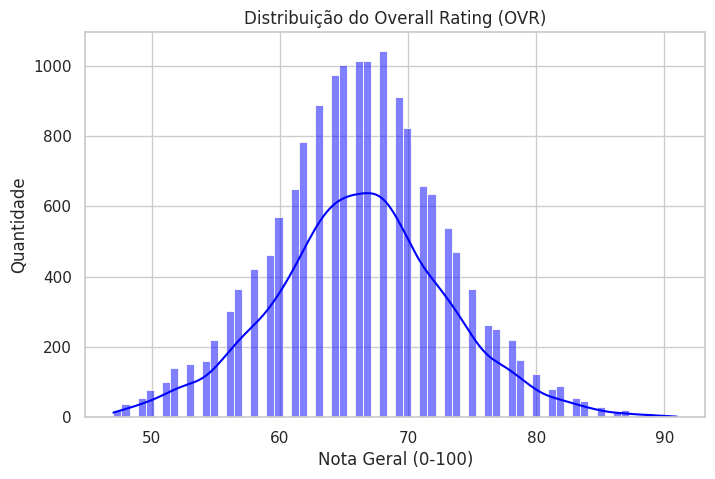

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['OVR'], kde=True, color='blue')
plt.title('Distribuição do Overall Rating (OVR)')
plt.ylabel('Quantidade')
plt.xlabel('Nota Geral (0-100)')
plt.show()

### Relação do peso e altura com posição:

/tmp/ipykernel_9967/4136093351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Simplified_Position', y='Height_cm', data=df, ax=ax[0], palette='Set2')
/tmp/ipykernel_9967/4136093351.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Simplified_Position', y='Weight_kg', data=df, ax=ax[1], palette='Set2')


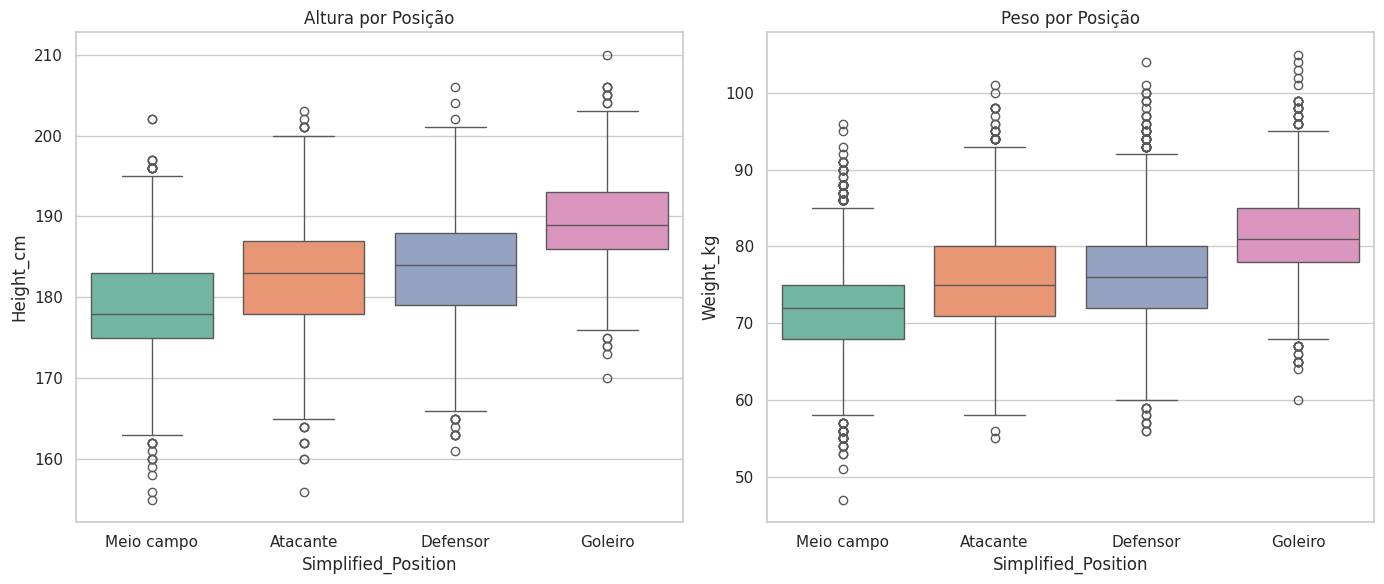

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='Simplified_Position', y='Height_cm', data=df, ax=ax[0], palette='Set2')
ax[0].set_title('Altura por Posição')
sns.boxplot(x='Simplified_Position', y='Weight_kg', data=df, ax=ax[1], palette='Set2')
ax[1].set_title('Peso por Posição')
plt.tight_layout()
plt.show()

### Correlação entre todos os atributos:

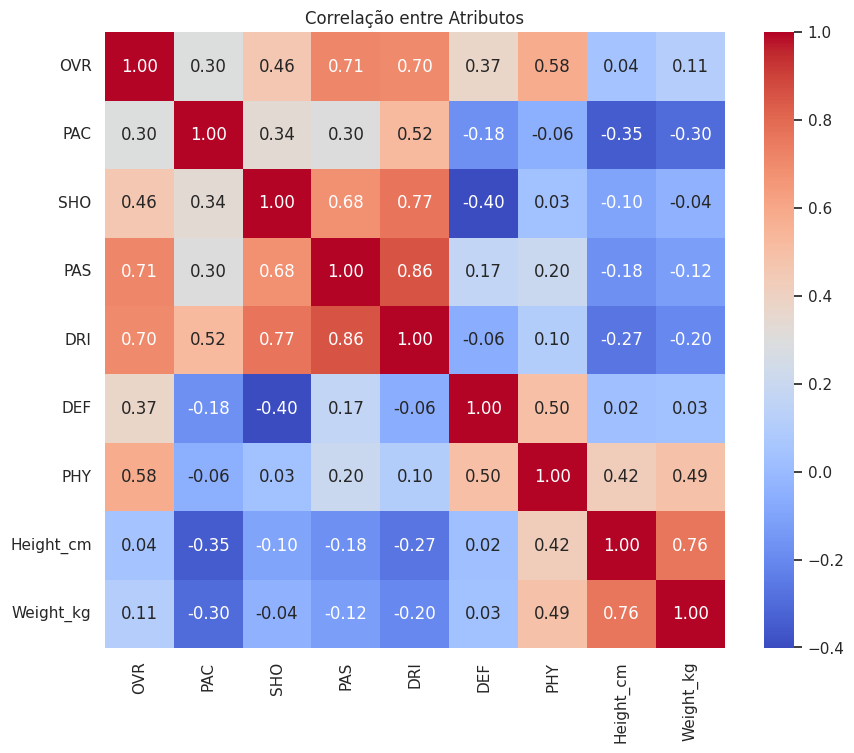

In [ ]:
cols_corr = ['OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Height_cm', 'Weight_kg']
plt.figure(figsize=(10, 8))
sns.heatmap(df[cols_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Atributos')
plt.savefig('heatmapfifa26.png', dpi=300, bbox_inches='tight') #gostei do grafico
plt.show()

#OVR = OVERALL
#PAC = RITMO(NORMALMENTE EU CONSIDERANDO SENDO O QUANTO O JOGADOR CORRE)
#SHO = CHUTE
#PAS = PASSE
#DRI = DRIBLE
#DEF = DEFESA
#PHY = FISICO


# Resultado das análises:
Baseado nos gráficos feitos, é possível ver que: <br>
O OVR possui distribuição com formato de curva padrão; <br>
Jogadores focados em defesa (Defensor e Goleiro) são maiores e mais pesados; e<br>
Peso e altura não afetam os outros valores, exceto a força; <br>


Com base nisso, duas hipóteses surgiram:
#### É possível criar um modelo que prevê a nota geral (OVR) de um jogador baseando-se apenas em seus atributos brutos (Chute, Passe, Físico, etc)? Se sim, quais possuem maior peso?

#### É possível determinar a posição de um jogador (Atacante, Meio-campo, Defensor) apenas olhando para seus atributos físicos e técnicos?

# Modelagem:

### Modelagem da primeira hipótese com regressão linear:

--- BASELINE (Chute pela Média) ---
Erro Médio Absoluto (MAE): 5.30 pontos
R² (Explicação): -0.0000 (Isso é zero por definição, pois a média não explica variação)
------------------------------

--- MODELO DE REGRESSÃO LINEAR ---
Erro Médio Absoluto (MAE): 2.50 pontos
Raiz do Erro Quadrático Médio (RMSE): 3.16 pontos
R² (Quanto explicamos): 0.7844
                            OLS Regression Results                            
Dep. Variable:                    OVR   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     6320.
Date:                Mon, 08 Dec 2025   Prob (F-statistic):               0.00
Time:                        18:11:49   Log-Likelihood:                -33044.
No. Observations:               12982   AIC:                         6.611e+04
Df Residuals:                   12973   BIC:                         6.617e+04
Df Model:         

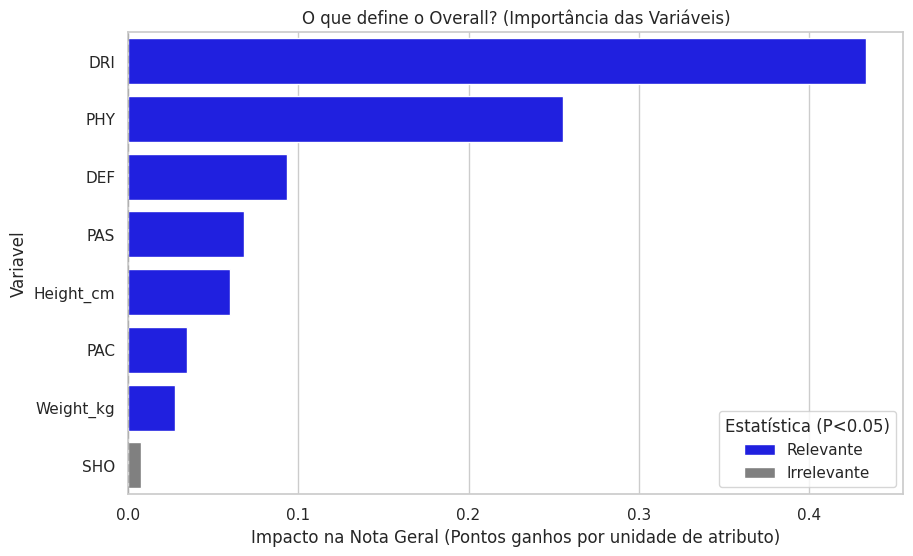

In [ ]:
features = ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Height_cm', 'Weight_kg']
target = 'OVR'

x = df[features]
y = df[target]

#0.2 = 20% para teste e o resto para treino
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#baseline será a media do treino
media_ovr = y_train.mean()
y_pred_baseline = [media_ovr] * len(y_test)


# Avaliação do Baseline
mae_base = mean_absolute_error(y_test, y_pred_baseline)
r2_base = r2_score(y_test, y_pred_baseline)


print(f"--- BASELINE (Chute pela Média) ---")
print(f"Erro Médio Absoluto (MAE): {mae_base:.2f} pontos")
print(f"R² (Explicação): {r2_base:.4f}")
print("-" * 30)

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

modelo_lr = sm.OLS(y_train, X_train_sm).fit()

y_pred_lr = modelo_lr.predict(X_test_sm)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)#raiz
r2_lr = r2_score(y_test, y_pred_lr)


print(f"\n--- MODELO DE REGRESSÃO LINEAR ---")
print(f"Erro Médio Absoluto (MAE): {mae_lr:.2f} pontos")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse_lr:.2f} pontos")
print(f"R² (quantos % os atributos influenciam no overall do jogador): {r2_lr:.4f}")

print(modelo_lr.summary())


coeficientes = pd.DataFrame({
    'Variavel': modelo_lr.params.index,
    'Impacto': modelo_lr.params.values,
    'P_Valor': modelo_lr.pvalues.values
})


coeficientes = coeficientes[coeficientes['Variavel'] != 'const']


coeficientes['Significancia'] = ['Relevante' if p < 0.05 else 'Irrelevante' for p in coeficientes['P_Valor']]


coeficientes = coeficientes.sort_values(by='Impacto', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coeficientes, x='Impacto', y='Variavel', hue='Significancia', dodge=False, palette={'Relevante': 'blue', 'Irrelevante': 'grey'})

plt.title('O que define o Overall? (Importância das Variáveis)')
plt.xlabel('Impacto na Nota Geral (Pontos ganhos por unidade de atributo)')
plt.axvline(0, color='black', linestyle='--') # Linha do zero
plt.legend(title='Estatística (P<0.05)')
plt.savefig('variaveis.png', dpi=300, bbox_inches='tight') #gostei do grafico pt 2
plt.show()

Baseado no resultado da regressão linear, é possivel afirmar que é posível definir o OVR de um jogador com os seus valores bases, e que alguns valores possuem maior peso nesse valor, com o drible possuindo o maior peso entre todos.

#### Valores do resultado: <br>
Erro Médio Absoluto (MAE): 2.50 pontos <br>
Raiz do Erro Quadrático Médio (RMSE): 3.16 pontos <br>
R²: 0.7844


### Modelagem da segunda hipótese com Naive Bayes e Regressão Logística:

/home/brcasp/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/brcasp/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


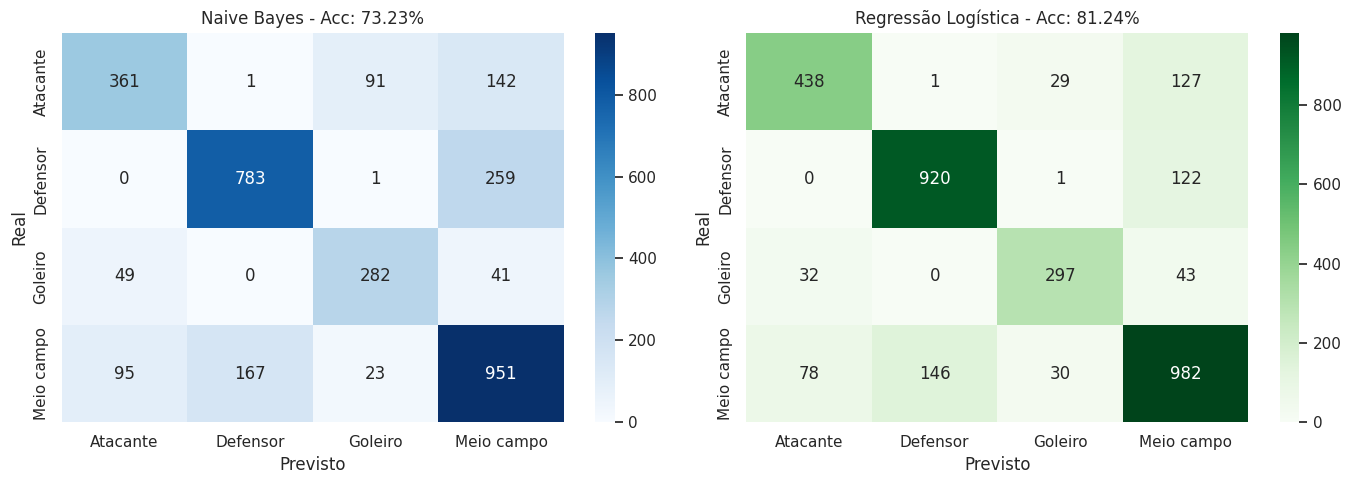

--- Relatório de Classificação (Regressão Logística) ---
              precision    recall  f1-score   support

    Atacante       0.80      0.74      0.77       595
    Defensor       0.86      0.88      0.87      1043
     Goleiro       0.83      0.80      0.81       372
  Meio campo       0.77      0.79      0.78      1236

    accuracy                           0.81      3246
   macro avg       0.82      0.80      0.81      3246
weighted avg       0.81      0.81      0.81      3246



In [ ]:

# Alvo agora é a Posição, não o OVR
y_class = df['Simplified_Position']
X_class = df[features]

# 20% teste
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# --- Gaussian Naive Bayes ---
nb_model = GaussianNB()
nb_model.fit(X_train_c, y_train_c)
y_pred_nb = nb_model.predict(X_test_c)

# --- Regressão Logística ---
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)
log_model.fit(X_train_c, y_train_c)
y_pred_log = log_model.predict(X_test_c)

# --- Matriz de Confusão ---
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Naive Bayes
sns.heatmap(confusion_matrix(y_test_c, y_pred_nb), annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_, ax=ax[0])
ax[0].set_title(f'Naive Bayes - Acc: {accuracy_score(y_test_c, y_pred_nb):.2%}')
ax[0].set_xlabel('Previsto')
ax[0].set_ylabel('Real')

# Plot Regressão Logística
sns.heatmap(confusion_matrix(y_test_c, y_pred_log), annot=True, fmt='d', cmap='Greens',
            xticklabels=log_model.classes_, yticklabels=log_model.classes_, ax=ax[1])
ax[1].set_title(f'Regressão Logística - Acc: {accuracy_score(y_test_c, y_pred_log):.2%}')
ax[1].set_xlabel('Previsto')
ax[1].set_ylabel('Real')

plt.tight_layout()
plt.savefig('comparacao_classificacao.png')
plt.show()

print("--- Relatório de Classificação (Regressão Logística) ---")
print(classification_report(y_test_c, y_pred_log))

Inicialmente, os goleiros estão incluidos dentro do dataset. Porém, vendo os gráficos, é possível ver que eles estão alterando o desempenho dos modelos de uma maneira negativa. Os goleiros têm stats de linha muito baixos, mas OVR alto. Isso mata a regressão. Por causa disso, ele foi removido do dataset.

### Funções de remoção de outliers (goleiros):

Tamanho original do dataset: 16228
Média de Chute (SHO) - Linha: 53.2
Média de Chute (SHO) - Goleiros: 63.2
Os Goleiros têm stats de linha muito baixos, mas OVR alto. Isso mata a regressão.

--- RESULTADOS PÓS-REMOÇÃO DE OUTLIERS (GOLEIROS) ---
antes o RMSE era 10, o MAE era 2.5
Novo MAE: 2.54
Novo RMSE: 3.20
Novo R²: 0.7700


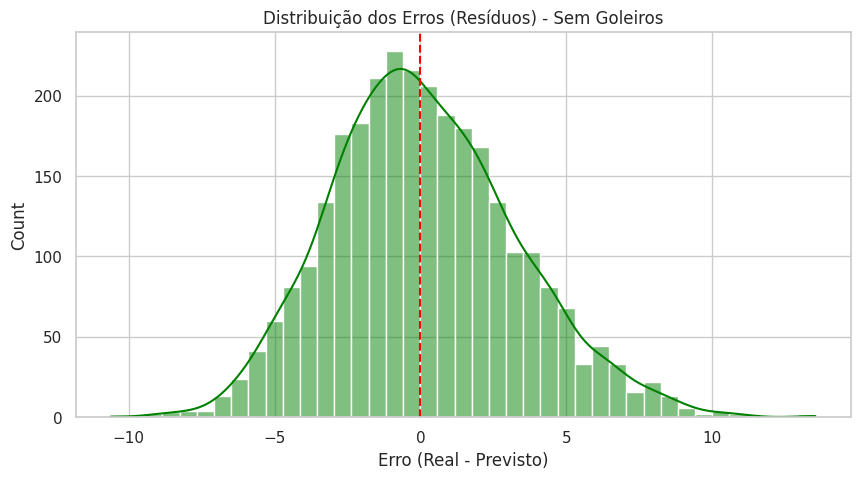

In [ ]:
print("Tamanho original do dataset:", len(df))


goleiros = df[df['Simplified_Position'] == 'Goleiro']
linha = df[df['Simplified_Position'] != 'Goleiro']

print(f"Média de Chute (SHO) - Linha: {linha['SHO'].mean():.1f}")
print(f"Média de Chute (SHO) - Goleiros: {goleiros['SHO'].mean():.1f}")
print("Os Goleiros têm stats de linha muito baixos, mas OVR alto. Isso mata a regressão.")

# Criando um novo dataframe apenas com jogadores de linha
df_clean = df[df['Simplified_Position'] != 'Goleiro'].copy()


# Redefinir X e y com o dataset limpo
X_clean = df_clean[features]
y_clean = df_clean['OVR']


X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

X_train_sm_2 = sm.add_constant(X_train_2)
X_test_sm_2 = sm.add_constant(X_test_2)

modelo_lr_v2 = sm.OLS(y_train_2, X_train_sm_2).fit()
y_pred_v2 = modelo_lr_v2.predict(X_test_sm_2)

mae_v2 = mean_absolute_error(y_test_2, y_pred_v2)
mse_v2 = mean_squared_error(y_test_2, y_pred_v2)
rmse_v2 = np.sqrt(mse_v2)
r2_v2 = r2_score(y_test_2, y_pred_v2)

print("\n--- RESULTADOS PÓS-REMOÇÃO DE OUTLIERS (GOLEIROS) ---")
print(f"Novo MAE: {mae_v2:.2f}")
print(f"Novo RMSE: {rmse_v2:.2f}")
print(f"Novo R²: {r2_v2:.4f}")


plt.figure(figsize=(10, 5))
residuals = y_test_2 - y_pred_v2
sns.histplot(residuals, kde=True, color='green')
plt.title('Distribuição dos Erros (Resíduos) - Sem Goleiros')
plt.xlabel('Erro (Real - Previsto)')
plt.axvline(0, color='red', linestyle='--') # Linha do erro zero
plt.show()

### Remodelagem sem os outliers:

/home/brcasp/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


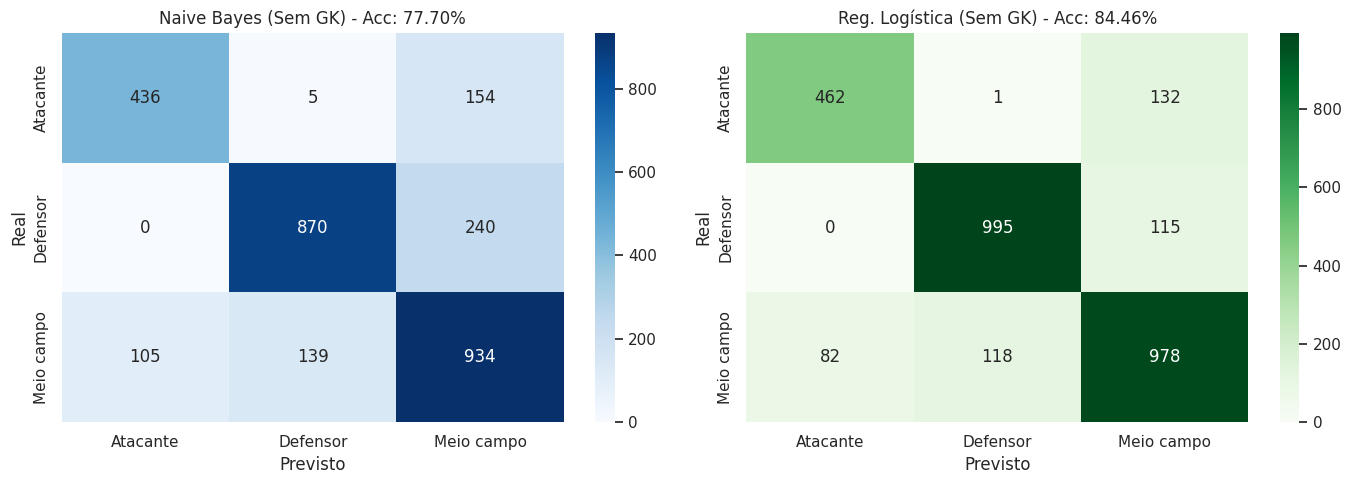

Sem Goleiros: 84.46%


In [ ]:
# --- CLASSIFICAÇÃO V2: APENAS JOGADORES DE LINHA ---

# 1. Preparar dados usando o dataset LIMPO (df_clean)
y_clean_c = df_clean['Simplified_Position']
X_clean_c = df_clean[features]

# 2. Divisão Treino/Teste
X_train_c2, X_test_c2, y_train_c2, y_test_c2 = train_test_split(X_clean_c, y_clean_c, test_size=0.2, random_state=42)

# --- RE-TREINAR MODELOS ---

# Modelo A: Naive Bayes
nb_model_v2 = GaussianNB()
nb_model_v2.fit(X_train_c2, y_train_c2)
y_pred_nb_v2 = nb_model_v2.predict(X_test_c2)

# Modelo B: Regressão Logística
log_model_v2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=3000)
log_model_v2.fit(X_train_c2, y_train_c2)
y_pred_log_v2 = log_model_v2.predict(X_test_c2)

# --- VISUALIZAÇÃO (Matriz 3x3 agora) ---
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Naive Bayes
sns.heatmap(confusion_matrix(y_test_c2, y_pred_nb_v2), annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_model_v2.classes_, yticklabels=nb_model_v2.classes_, ax=ax[0])
ax[0].set_title(f'Naive Bayes (Sem GK) - Acc: {accuracy_score(y_test_c2, y_pred_nb_v2):.2%}')
ax[0].set_xlabel('Previsto')
ax[0].set_ylabel('Real')

# Plot Regressão Logística
sns.heatmap(confusion_matrix(y_test_c2, y_pred_log_v2), annot=True, fmt='d', cmap='Greens',
            xticklabels=log_model_v2.classes_, yticklabels=log_model_v2.classes_, ax=ax[1])
ax[1].set_title(f'Reg. Logística (Sem GK) - Acc: {accuracy_score(y_test_c2, y_pred_log_v2):.2%}')
ax[1].set_xlabel('Previsto')
ax[1].set_ylabel('Real')

plt.tight_layout()
plt.show()


print(f"Sem Goleiros: {accuracy_score(y_test_c2, y_pred_log_v2):.2%}")

Baseado no resultado dos modelos Naive Bayes e Regressão Logística, é possivel afirmar que é posível prever a posição de um jogador com base nos seus valores bases.

#### Valores do resultado: <br>
##### Antes da remoção de outliers:
Erro Médio Absoluto (MAE): 2.5 pontos <br>
Raiz do Erro Quadrático Médio (RMSE): 10 pontos <br>

##### Após remoção de outliers:
Erro Médio Absoluto (MAE): 2.54 pontos <br>
Raiz do Erro Quadrático Médio (RMSE): 3.20 pontos <br>
R²: 0.7700

# Conclusão:
Após análise dos dados, tratamentos realizados e graficos feitos, ambas as hipóteses se provaram verdadeiras, a hipótese advinhar posição do jogador baseada nos atributos brutos foi provada com o erro médio absoluto após a regressão sendo cerca de 50% menor que o erro médio absoluto do baseline, na qua possui cerca de 5 pontos, o erro médio após regressão caiu para 2.5 pontos.

A hipótese de prever a posição foi provada por meio dos gráficos, ocorreu também a comparação entre os algoritmos com a regressão logística sendo a mais eficiente com 84% de acurácia, provando que é possível prever as posições com base nos seus atributos